In [1]:
import os
import networkx as nx
import pickle

import matching.glema.common.utils.arg_utils as arg_utils
import matching.glema.common.utils.graph_utils as graph_utils
import matching.glema.common.utils.io_utils as io_utils
import matching.glema.common.utils.plot_utils as plot_utils
from matching.glema.common.dataset import BaseDataset

In [2]:
args = arg_utils.parse_args( use_default=True )
model_ckpt = f"{args.ckpt_dir}/CPG_best_with_anchor_emb/best_model.pt"
args = arg_utils.load_args( args, model_ckpt )
args.ckpt = model_ckpt
args.embedding_dim = 6
args.directed = True

In [3]:
data_path = io_utils.get_abs_file_path( os.path.join( args.data_processed_dir, args.dataset ) )
if args.directed:
    data_path += "_directed"

data_path

'/Users/jeanjour/Documents/projects/python/dpd-subgraph-matching/matching/glema/data/data_processed/CPG_directed'

In [4]:
with open( args.test_keys, "rb" ) as fp:
    test_keys = pickle.load( fp )
print( f"Number of test data: {len( test_keys )}" )

Number of test data: 2368


In [5]:
test_dataset = BaseDataset( test_keys, data_path, embedding_dim=args.embedding_dim )

In [6]:
sample_idx = 33
sample_data = test_dataset.get_data( sample_idx )
query, source, mapping = sample_data
mapping = { qnid: snid for qnid, snid in mapping }
query = nx.relabel_nodes( query, mapping )

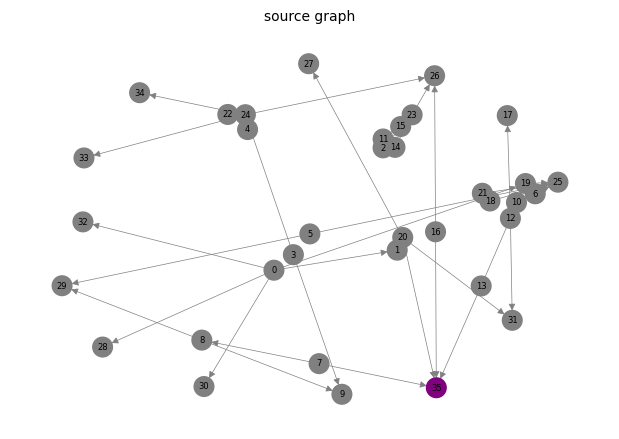

In [7]:
source_colors = [ "purple" if d["anchor"] == 1 else "grey" for n, d in source.nodes( data=True ) ]
plot_utils.plot_graph( title="source graph", graph=source, nodeColors=source_colors )

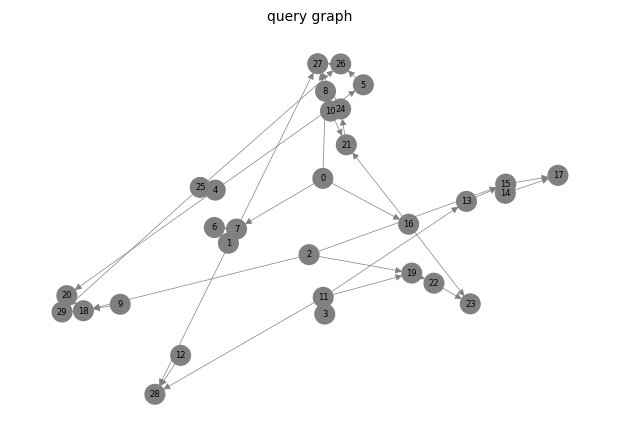

In [8]:
query_colors = [ "purple" if d["anchor"] == 1 else "grey" for n, d in query.nodes( data=True ) ]
plot_utils.plot_graph( title="query graph", graph=query, nodeColors=query_colors )

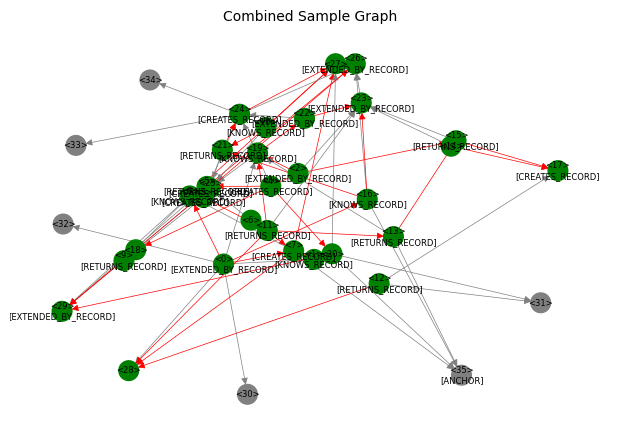

In [9]:
matching_colors = {
    2: "purple",
    1: "green",
    0: "grey",
    -1: "red"
}
combined, node_colors, edge_colors = graph_utils.combine_graph( source, query,
                                                          matching_colors=matching_colors )
plot_utils.plot_graph(
    title="Combined Sample Graph",
    graph=combined,
    nodeColors=node_colors,
    edgeColors=edge_colors,
    nodeLabels=graph_utils.get_node_labels( combined )
)

In [10]:
sample_tensors = test_dataset.__getitem__( sample_idx )
sample_tensors

{'H': array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [